In [1]:
import numpy as np

# some_file.py
import sys
sys.path.insert(0, '../src/easyesn/')

In [2]:
from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import matplotlib.pyplot as plt


Using Numpy backend.


In [3]:
inputLength = 1000
trainingLength = int(inputLength*0.7)
data = np.linspace(0, 4*np.pi, inputLength).reshape(-1,1)

inputData = np.sin(data)
outputData = np.cos(data)

inputDataTraining = inputData[:trainingLength]
inputDataValidation = inputData[trainingLength:]

outputDataTraining = outputData[:trainingLength]
outputDataValidation = outputData[trainingLength:]

In [4]:
esn = PredictionESN(n_input=1, n_output=1, n_reservoir=50, leakingRate=0.2, spectralRadius=0.2, regressionParameters=[1e-2], solver="lsqr", feedback=True)

## GradientOptimizer - Prediction

In [5]:
opt = GradientOptimizer(esn, learningRate=0.001)

In [6]:
validationLosses, fitLosses, inputScalings, spectralRadiuses, leakingRates, learningRates = opt.optimizeParameterForTrainError(inputDataTraining, outputDataTraining, inputDataValidation, outputDataValidation, epochs=150, transientTime=100)

100% (150 of 150) |#######################| Elapsed Time: 0:00:30 Time: 0:00:30


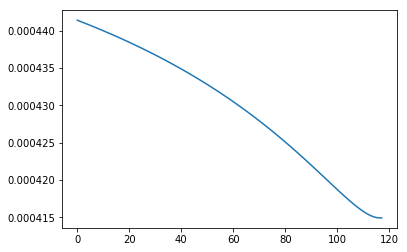

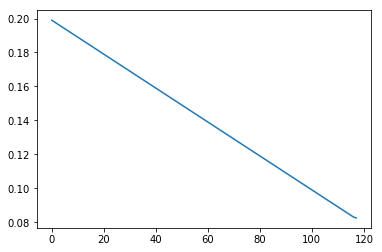

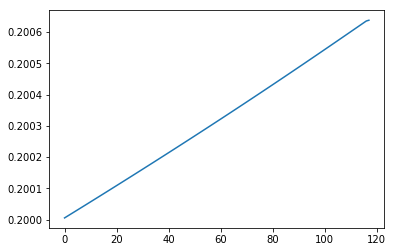

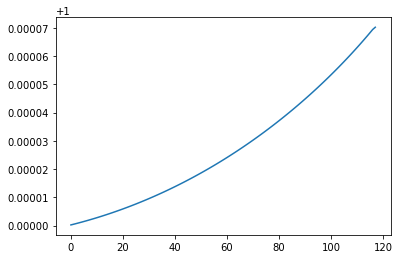

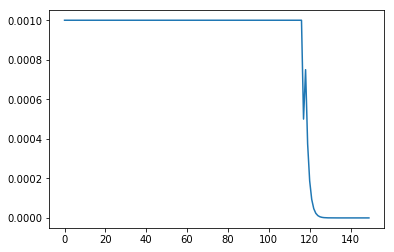

In [7]:
plt.plot(fitLosses)
plt.show()
plt.plot(spectralRadiuses)
plt.show()
plt.plot(leakingRates)
plt.show()
plt.plot(inputScalings)
plt.show()
plt.plot(learningRates)
plt.show()

## GradientOptimization - Generation

In [8]:
esn = PredictionESN(n_input=0, n_output=1, n_reservoir=50, regressionParameters=[1e-2], solver="lsqr", feedback=True)

In [9]:
opt = GradientOptimizer(esn, learningRate=0.001)

In [11]:
validationLosses, fitLosses, spectralRadiuses, leakingRates, inputScalings = opt.optimizeParameterForGenerativeValidationError(None, outputDataTraining, outputDataValidation, epochs=150, transientTime=100)

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
plt.plot(fitLosses)
plt.show()
plt.plot(spectralRadiuses)
plt.show()
plt.plot(leakingRates)
plt.show()
plt.plot(inputScalings)
plt.show()